# Summary
    This project is build using dataset of customer behavior from Kaggle, looking for predict the capability of payment, given a new client data.
    Using various types of categorical models, spliting data set to better implement and deploy.
    

# Libraries 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
sns.set_theme(color_codes=True, style='dark', font='sans-serif')
%matplotlib inline

In [148]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Getting Data

In [4]:
# reading data from csv file
df = pd.read_csv("../Python for DS/Bank Dataset.csv")
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [78]:
# Loking through the variables types
df.info()
# Looking for NA in Dataset
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [79]:
df.describe() 

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# EDA

Deeper looking on variables, searching for patterns and anomalies that could help us understand better how they affect the target variable

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

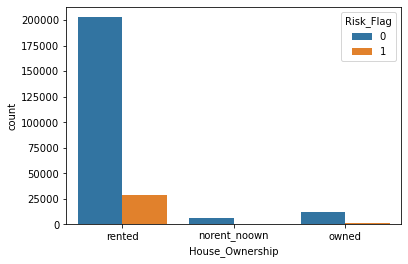

In [40]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df)

<Figure size 576x504 with 0 Axes>

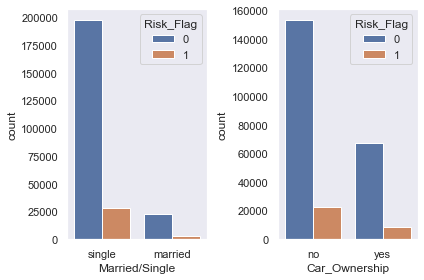

In [150]:
plt.figure(figsize=(8,7))
fig, ax = plt.subplots(1,2)
sns.countplot(df['Married/Single'], ax=ax[0], hue=df['Risk_Flag'])
sns.countplot(df['Car_Ownership'], ax=ax[1], hue=df['Risk_Flag'])
plt.tight_layout()

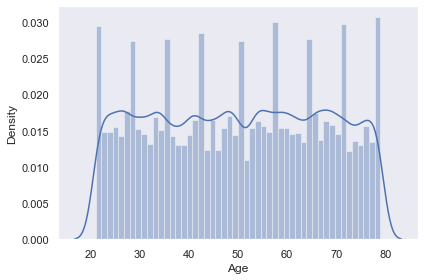

In [151]:
sns.distplot(a=df['Age']); 
#sns.displot(x=df['Age']);

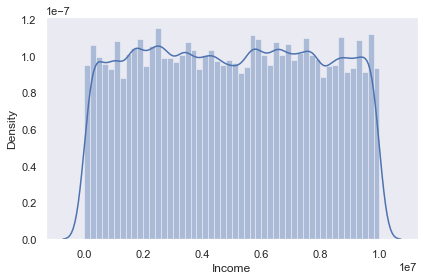

In [152]:
sns.distplot(a=df['Income']);  
#well distributed income data

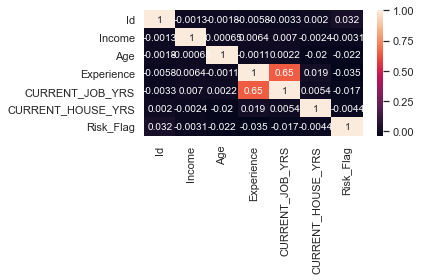

In [77]:
sns.heatmap(data=df.corr(), annot=True);  

#variables looking good, not much correlated, excluding 'Experience' and 'current_job_years', that make sense being correlated.

Checking for Outliers

<AxesSubplot:>

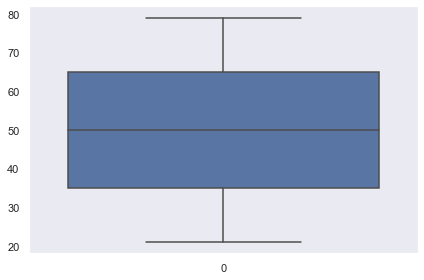

In [84]:
sns.boxplot(data=df['Age'])  #no outliers

<AxesSubplot:>

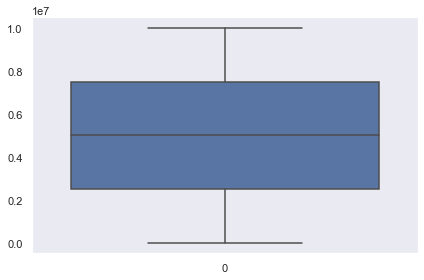

In [87]:
sns.boxplot(data=df['Income']) #no outliers

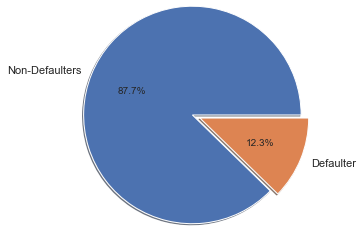

In [98]:
p = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(p, explode=[0.05, 0.1], labels=['Non-Defaulters', 'Defaulter'], radius=2, autopct='%1.1f%%', shadow=True);

In [102]:
#Counting how many unique rows have on that columns
print(len(df['CITY'].unique()))
print(len(df['STATE'].unique()))
print(len(df['Profession'].unique()))

317
29
51


# Summary of data visualization
    The target variable are skewed heavly (88% - 12%) 
    No Outliers but need to scale age and income
    Experience and job years are correlated, drop then on feature selection or use Principal Component Analysis(PCA)
    Put married and car ownership on binare form
    Find the relationship with categorical variables and target variable using chi-square test

In [106]:
#build chi-square test function

def chi_square_test(data):
    stat, p, dof, expected = chi2_contingency(car_ownership_risk_flag)
    alpha = 0.05
    print('p values is'+ str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')



In [107]:
car_ownership_risk_flag = pd.crosstab(df['Car_Ownership'], df['Risk_Flag'])
car_ownership_risk_flag

Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


In [108]:
chi_square_test(car_ownership_risk_flag)

p values is1.7350853850183746e-33
Dependent (reject H0)


In [109]:
marital_status_risk_flag = pd.crosstab(df['Married/Single'], df['Risk_Flag'])
marital_status_risk_flag

Risk_Flag,0,1
Married/Single,,
married,23092,2636
single,197912,28360


In [110]:
chi_square_test(marital_status_risk_flag)

p values is1.7350853850183746e-33
Dependent (reject H0)


In [111]:
house_ownership_risk_flag = pd.crosstab(df['House_Ownership'], df['Risk_Flag'])
house_ownership_risk_flag

Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [112]:
chi_square_test(house_ownership_risk_flag)

p values is1.7350853850183746e-33
Dependent (reject H0)


Building PCA

In [113]:
features = ['CURRENT_JOB_YRS','Experience']

df_for_pca = df[features]
scaled_df_for_pca = (df_for_pca - df_for_pca.mean(axis=0)/df_for_pca.std())  #normalizate(scaled) data on df
scaled_df_for_pca

,CURRENT_JOB_YRS,Experience
0,1.263289,1.319986
1,7.263289,8.319986
2,2.263289,2.319986
3,0.263289,0.319986
4,1.263289,9.319986
...,...,...
251995,4.263289,11.319986
251996,4.263289,8.319986
251997,5.263289,5.319986
251998,-1.736711,-1.680014


In [114]:
pca = PCA()
df_pca = pca.fit_transform(scaled_df_for_pca)
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=component_names)

df_pca.head()

,PC1,PC2
0,-7.829487,-0.055695
1,1.076223,-2.440714
2,-6.495497,-0.525236
3,-9.163478,0.413845
4,-0.615362,3.402106


In [115]:
df1 = pd.concat([df, df_pca], axis=1)  #new df with PCA variables 
df1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,-7.829487,-0.055695
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1.076223,-2.440714
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,-6.495497,-0.525236
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,-9.163478,0.413845
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,-0.615362,3.402106


In [116]:
features = ['Married/Single', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
label_encoder = LabelEncoder()

for col in features:
    df1[col] = label_encoder.fit_transform(df1[col])

In [117]:
df2= pd.get_dummies(df1, columns=["House_Ownership"])
df2.drop(['Id'], axis=1, inplace=True)

In [119]:
X = df2.drop(['Risk_Flag'], axis=1)
y = df2.Risk_Flag

#setting the train and test dataframes to use in various models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,PC1,PC2,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
157193,5421595,45,4,1,0,0,102,10,4,12,-6.495497,-0.525236,0,0,1
125307,7585042,53,15,1,0,35,252,7,3,13,2.991701,5.131006,0,0,1
102075,3319389,35,5,1,1,17,174,19,5,11,-5.161506,-0.994777,0,0,1
235132,3880165,33,1,1,0,3,96,25,1,11,-10.497469,0.883386,0,0,1
13524,2729670,23,10,1,0,3,264,23,10,13,1.508448,-3.342480,0,0,1


In [121]:
sm = SMOTE(random_state = 500) 
X_res, y_res = sm.fit_resample(X_train, y_train)

# TESTING AND EVALUATING MODELS

In [124]:
### REGRESSÃO LOGISTICA

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 500000)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8774867724867725

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.51      0.81      0.62      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



In [128]:
### KNN Model

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8595238095238096

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     66338
           1       0.44      0.57      0.50      9262

    accuracy                           0.86     75600
   macro avg       0.69      0.73      0.71     75600
weighted avg       0.88      0.86      0.87     75600



In [130]:
### RANDOM FOREST CLASSIFICATION

from sklearn.ensemble import RandomForestClassifier

mode = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=420)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8595238095238096

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     66338
           1       0.44      0.57      0.50      9262

    accuracy                           0.86     75600
   macro avg       0.69      0.73      0.71     75600
weighted avg       0.88      0.86      0.87     75600



In [132]:
### DECISION TREE

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=420)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8658597883597884

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     66338
           1       0.47      0.85      0.61      9262

    accuracy                           0.87     75600
   macro avg       0.72      0.86      0.76     75600
weighted avg       0.91      0.87      0.88     75600



In [136]:
### XGBOOST 

from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1, n_estimators=1000, use_label_encoder=False, random_state=420)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

[15:21:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8923412698412698

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     66338
           1       0.54      0.78      0.64      9262

    accuracy                           0.89     75600
   macro avg       0.75      0.84      0.79     75600
weighted avg       0.92      0.89      0.90     75600



In [138]:
### AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=15000)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.5628968253968254

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.57      0.70     66338
           1       0.15      0.53      0.23      9262

    accuracy                           0.56     75600
   macro avg       0.52      0.55      0.46     75600
weighted avg       0.80      0.56      0.64     75600



In [140]:
### Passive Agressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(random_state=14500)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8146825396825397

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     66338
           1       0.13      0.09      0.11      9262

    accuracy                           0.81     75600
   macro avg       0.50      0.50      0.50     75600
weighted avg       0.79      0.81      0.80     75600



In [142]:
### Bagging Classifier
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=14500)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8777910052910053

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.50      0.82      0.62      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.77     75600
weighted avg       0.91      0.88      0.89     75600



In [144]:
### Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.5830820105820106

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71     66338
           1       0.17      0.59      0.26      9262

    accuracy                           0.58     75600
   macro avg       0.54      0.59      0.48     75600
weighted avg       0.82      0.58      0.65     75600



In [146]:
### Extra Tree
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(criterion='entropy', random_state=15000)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
accuracy

0.8807010582010582

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.51      0.81      0.62      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



# Conclusion
    Training all the models with a training data set, we predicted the data from test dataset getting close to real data income, we could conclude that XGBoost would be selected, with approximately 89% accuracy.
    The Random Forest and Extra Tree model performed well too, and could also be chosed.
    Could be done some Random Undersampling to get more accurate realist results.
    

Reference
Link dataset https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior